# ✈️ Flight Fare Prediction — Task 03 (Texas Style)

NOTEBOOK_TITLE = "❤️ Flight Fare Prediction — Task 03 Notebook"
DATASET_FILE   = "Flight_Fare.csv"

Objective
---------
This Texas-style notebook predicts whether a flight fare is 'Affordable' or 'Expensive'
using a Decision Tree Classifier. The dataset contains detailed flight booking records:
airline, timings, duration, number of stops, route, and ticket price.

Notebook Outline
----------------
1) Load & inspect data
2) Domain analysis — understand context & features
3) Clean & prepare data
4) Feature engineering
5) Descriptive statistics & grouped summaries
6) Visualizations
7) Model training (Decision Tree Classifier)
8) Evaluation & insights

Notes
-----
- Keep code simple and readable.
- Use clear plots and concise comments after each cell.
- Save key artifacts (cleaned data, figures, model) when useful.
"""


# Domain Analysis:
# The dataset contains real-world flight booking details from various airlines in India.
# Features and their meaning:
 - Airline: Name of the airline operating the flight.
 - Date_of_Journey: Date on which the passenger is traveling.
 - Source: The starting city of the journey.
 - Destination: The city where the journey ends.
 - Route: The route taken by the flight including layovers.
 - Dep_Time: Departure time of the flight.
 - Arrival_Time: Arrival time of the flight.
 - Duration: Total travel time including layovers.
 - Total_Stops: Number of stops during the journey.
 - Additional_Info: Extra information (e.g., meal info, baggage allowance).
 - Price: Ticket price in INR.

# Business Use Case:
# Understanding flight fare patterns can help airlines and travel companies
# create dynamic pricing models, and help passengers find affordable flights.

In [127]:
# Importing core libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter
%matplotlib inline

# Setting some display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [129]:
# Load CSV data into a Pandas DataFrame
df = pd.read_csv("Flight_Fare.csv")

In [131]:
# Checking the structure of the dataset
df.info()

# This will help us see:
# - Total rows & columns
# - Column names and data types
# - Null/non-null counts for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [133]:
# Display the first 5 rows to get a quick glimpse
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [135]:
# Display number of rows and columns
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 10683
Total Columns: 11


In [137]:
# Count of missing values in each column
missing_data = df.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [139]:
# Since 'Route' and 'Total_Stops' have missing values, let's fill them appropriately

# Fill missing Route values with "Unknown"
df['Route'] = df['Route'].fillna("Unknown")

# Fill missing Total_Stops with "non-stop" (assuming missing = direct flight)
df['Total_Stops'] = df['Total_Stops'].fillna("non-stop")

# Verify again
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [141]:
# Missing value percentage for each column
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Series([], dtype: float64)


In [143]:
# Summary statistics
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [145]:
# Top 10 most frequent routes
df['Route'].value_counts().head(10)

Route
DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
CCU ? DEL ? BLR           565
BLR ? BOM ? DEL           402
MAA ? CCU                 381
DEL ? HYD ? COK           326
DEL ? JAI ? BOM ? COK     240
Name: count, dtype: int64

In [147]:
# Get statistical summary for numeric columns (like Price)
df.describe()

# This gives mean, min, max, and percentiles for numeric fields

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [149]:
# Top 10 most frequent routes
df['Route'].value_counts().head(10)

Route
DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
CCU ? DEL ? BLR           565
BLR ? BOM ? DEL           402
MAA ? CCU                 381
DEL ? HYD ? COK           326
DEL ? JAI ? BOM ? COK     240
Name: count, dtype: int64

In [151]:
# Price distribution basic stats
print(f"Minimum Price: {df['Price'].min()}")
print(f"Maximum Price: {df['Price'].max()}")
print(f"Average Price: {df['Price'].mean():.2f}")

Minimum Price: 1759
Maximum Price: 79512
Average Price: 9087.06


In [153]:
# Let's check how many unique values each column has
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Airline: 12 unique values
Date_of_Journey: 44 unique values
Source: 5 unique values
Destination: 6 unique values
Route: 129 unique values
Dep_Time: 222 unique values
Arrival_Time: 1343 unique values
Duration: 368 unique values
Total_Stops: 5 unique values
Additional_Info: 10 unique values
Price: 1870 unique values


In [155]:
# Converting 'Date_of_Journey' to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Extract day and month from the date
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

# Drop the original column to avoid duplication
df.drop(['Date_of_Journey'], axis=1, inplace=True)

df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [157]:
# Duration is in 'Xh Ym' format — converting it into total minutes
def duration_to_minutes(duration):
    h = 0
    m = 0
    parts = duration.strip().split()
    for p in parts:
        if 'h' in p:
            h = int(p.replace('h', ''))
        elif 'm' in p:
            m = int(p.replace('m', ''))
    return h*60 + m

df['Duration_mins'] = df['Duration'].apply(duration_to_minutes)

# Drop original Duration column
df.drop(['Duration'], axis=1, inplace=True)

In [159]:
# Encode categorical features using pd.get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# Display encoded DataFrame shape
df_encoded.shape

(10683, 1728)

In [161]:
# Create target variable based on Price threshold
# Let's assume price below median = Affordable, above = Expensive
median_price = df['Price'].median()

df_encoded['Fare_Class'] = df['Price'].apply(lambda x: 'Affordable' if x <= median_price else 'Expensive')

# Drop original price to avoid data leakage in classification
df_encoded.drop(['Price'], axis=1, inplace=True)

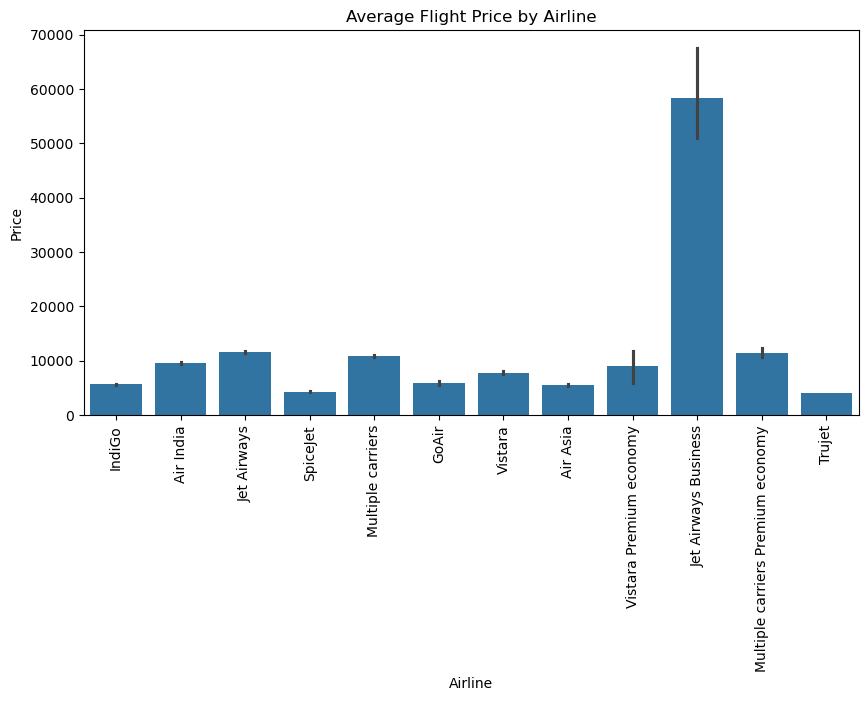

In [163]:
# Plot average ticket price per airline
plt.figure(figsize=(10,5))
sns.barplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Average Flight Price by Airline")
plt.show()

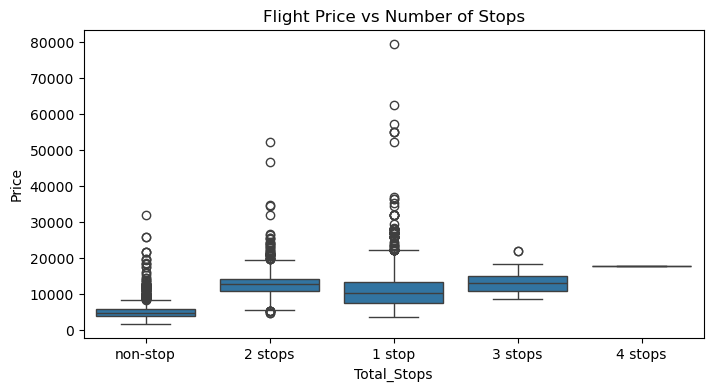

In [164]:
# Plot relationship between stops and price
plt.figure(figsize=(8,4))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title("Flight Price vs Number of Stops")
plt.show()

In [165]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop(['Fare_Class'], axis=1)
y = df_encoded['Fare_Class']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [169]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions on test set
y_pred = dt_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.873654656059897

Classification Report:
               precision    recall  f1-score   support

  Affordable       0.97      0.77      0.86      1061
   Expensive       0.81      0.97      0.89      1076

    accuracy                           0.87      2137
   macro avg       0.89      0.87      0.87      2137
weighted avg       0.89      0.87      0.87      2137



In [171]:
# Ensure all times have HH:MM format by appending ":00" where needed
df['Dep_Time'] = df['Dep_Time'].astype(str).apply(lambda x: x if ':' in x else x + ':00')
df['Arrival_Time'] = df['Arrival_Time'].astype(str).apply(lambda x: x if ':' in x else x + ':00')

# Convert to hour
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M', errors='coerce').dt.hour
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M', errors='coerce').dt.hour

# Check result
df[['Dep_Time', 'Arrival_Time']].head()


,Dep_Time,Arrival_Time
0,22,NaN
1,5,13.0
2,9,NaN
3,18,23.0
4,16,21.0


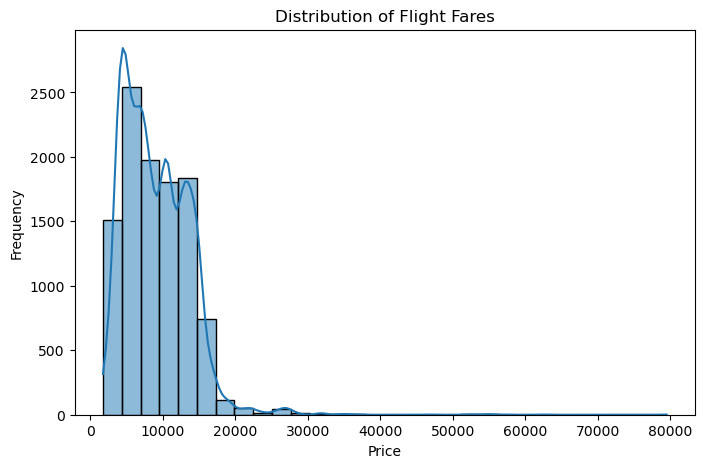

In [173]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Fares')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

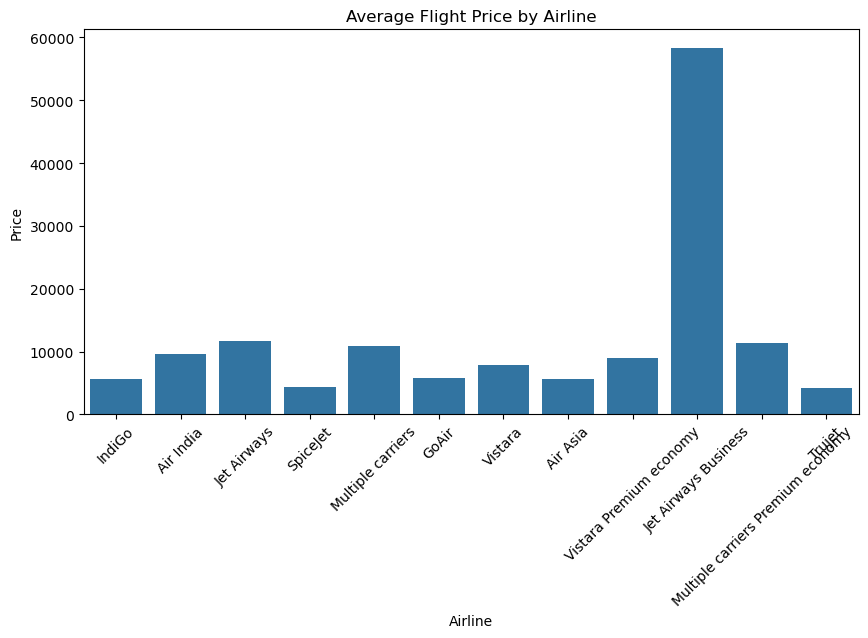

In [174]:
plt.figure(figsize=(10,5))
sns.barplot(x='Airline', y='Price', data=df, estimator='mean', errorbar=None)
plt.title('Average Flight Price by Airline')
plt.xticks(rotation=45)
plt.show()

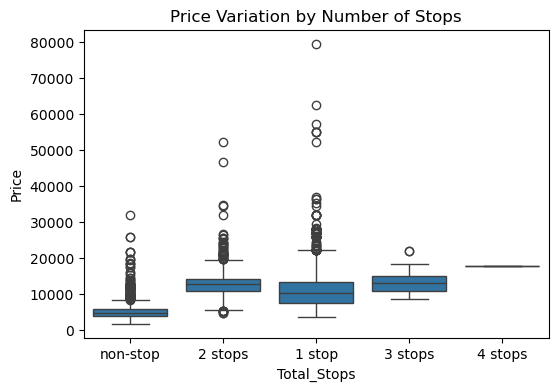

In [179]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Price Variation by Number of Stops')
plt.show()

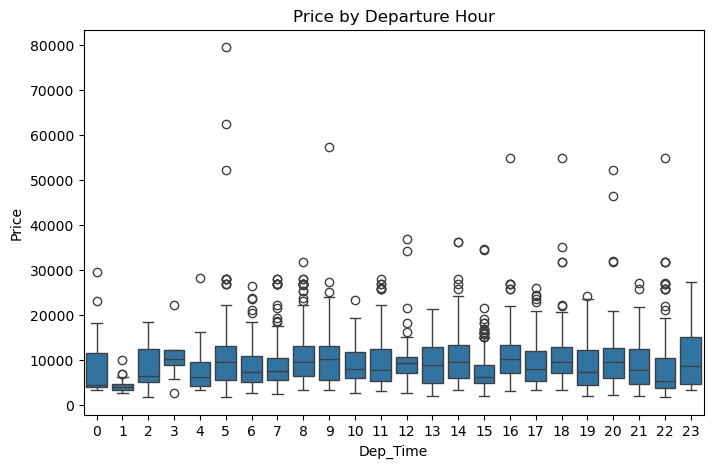

In [180]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Dep_Time', y='Price', data=df)
plt.title('Price by Departure Hour')
plt.show()

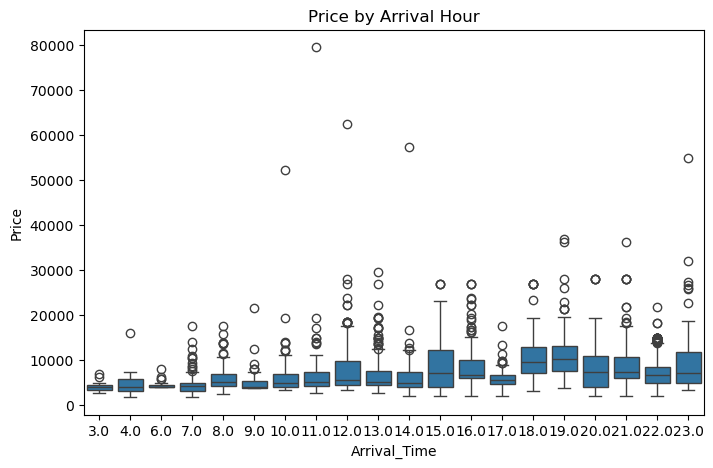

In [183]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Arrival_Time', y='Price', data=df)
plt.title('Price by Arrival Hour')
plt.show()

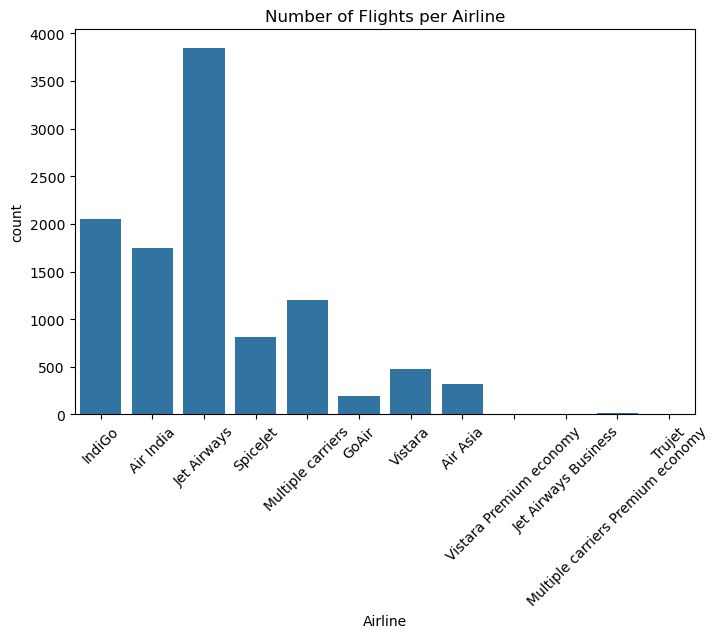

In [184]:
plt.figure(figsize=(8,5))
sns.countplot(x='Airline', data=df)
plt.title('Number of Flights per Airline')
plt.xticks(rotation=45)
plt.show()

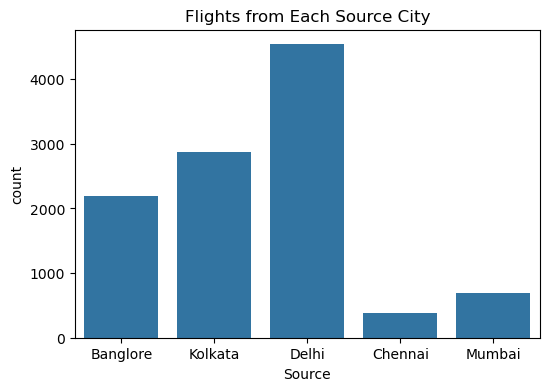

In [187]:
plt.figure(figsize=(6,4))
sns.countplot(x='Source', data=df)
plt.title('Flights from Each Source City')
plt.show()

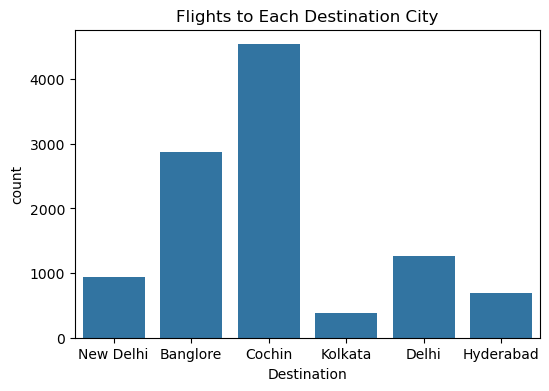

In [188]:
plt.figure(figsize=(6,4))
sns.countplot(x='Destination', data=df)
plt.title('Flights to Each Destination City')
plt.show()

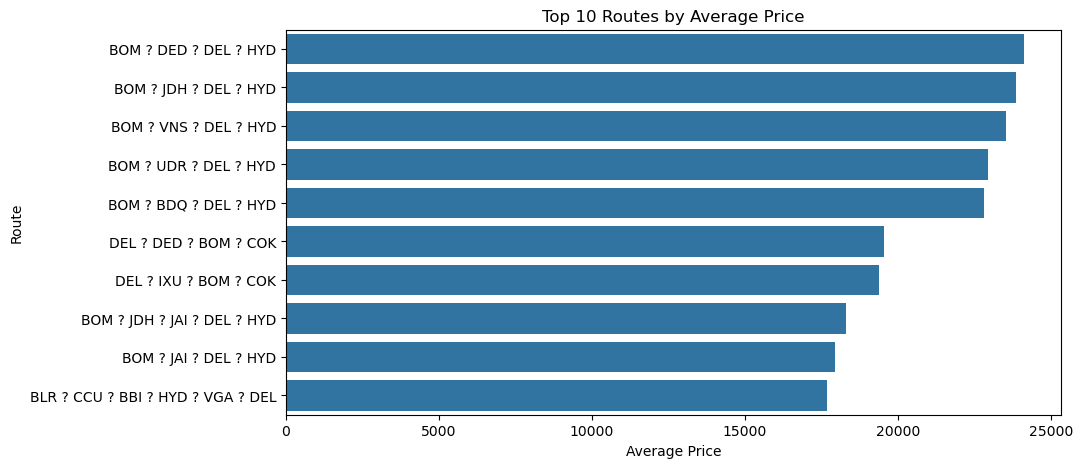

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

top_routes_price = df.groupby('Route')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_routes_price.values, y=top_routes_price.index)
plt.title('Top 10 Routes by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Route')
plt.show()

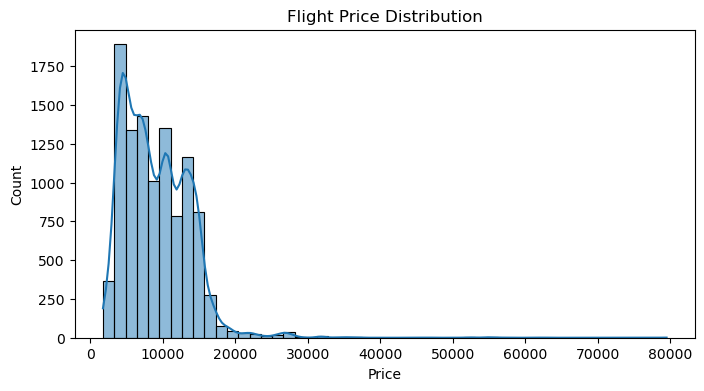

In [192]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.show()

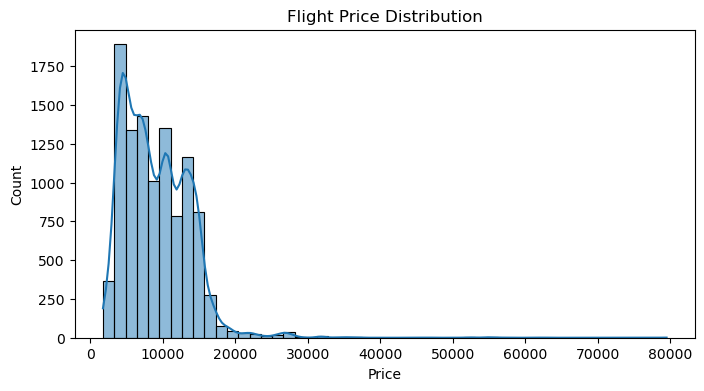

In [195]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.show()

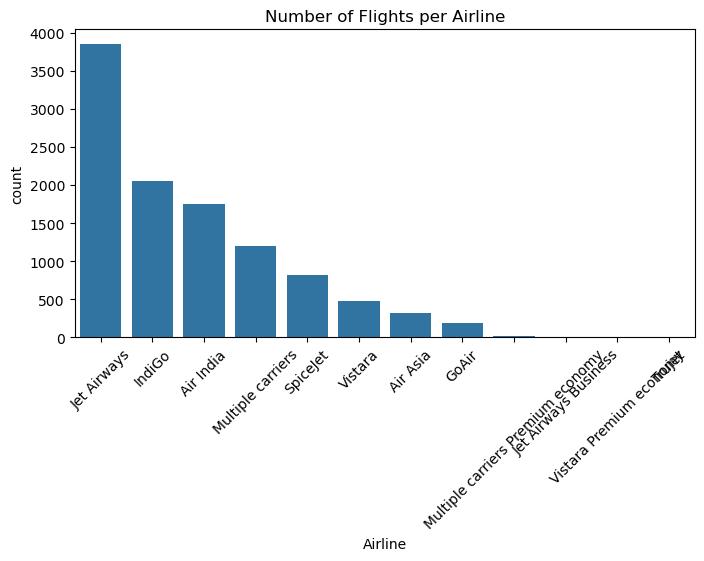

In [196]:
plt.figure(figsize=(8,4))
sns.countplot(x='Airline', data=df, order=df['Airline'].value_counts().index)
plt.title('Number of Flights per Airline')
plt.xticks(rotation=45)
plt.show()

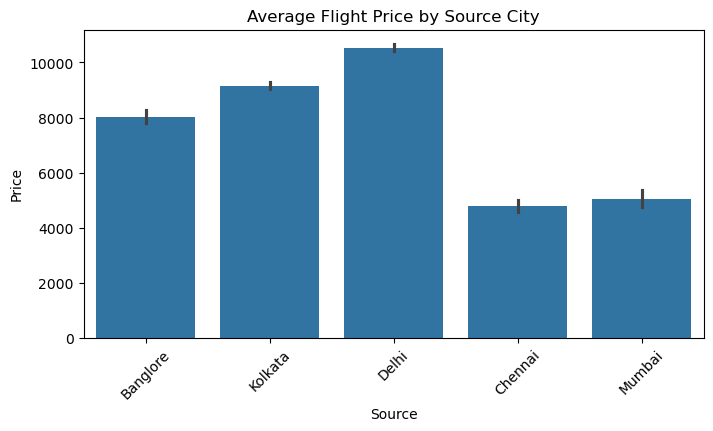

In [199]:
plt.figure(figsize=(8,4))
sns.barplot(x='Source', y='Price', data=df, estimator='mean')
plt.title('Average Flight Price by Source City')
plt.xticks(rotation=45)
plt.show()

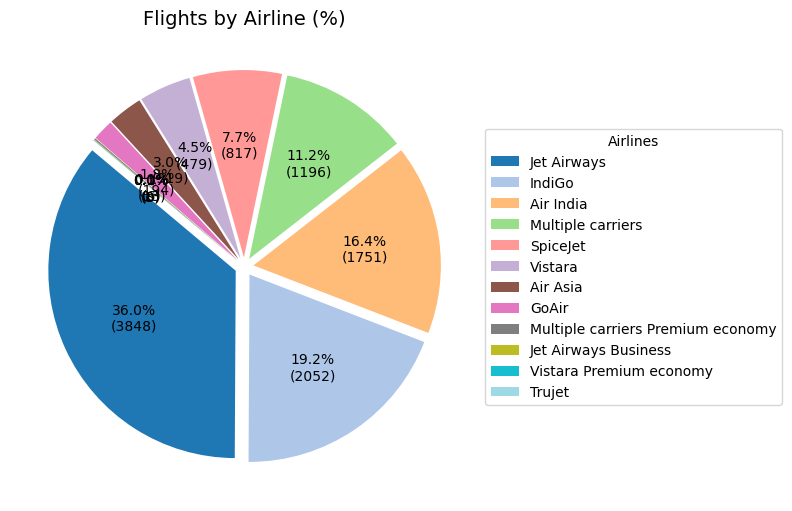

In [200]:
import matplotlib.pyplot as plt
import numpy as np

if 'Airline' in df.columns:
    counts = df['Airline'].value_counts()
    airlines = counts.index
    values = counts.values
    
    # Create explode effect for visibility
    explode = [0.05] * len(airlines)
    
    plt.figure(figsize=(8,8))
    wedges, texts, autotexts = plt.pie(
        values, 
        explode=explode, 
        autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*np.sum(values))})",
        startangle=140,
        colors=plt.cm.tab20(np.linspace(0, 1, len(values))),
        textprops={'fontsize': 10}
    )
    
    # Add legend outside
    plt.legend(wedges, airlines, title="Airlines", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.title("Flights by Airline (%)", fontsize=14)
    plt.tight_layout()
    plt.show()

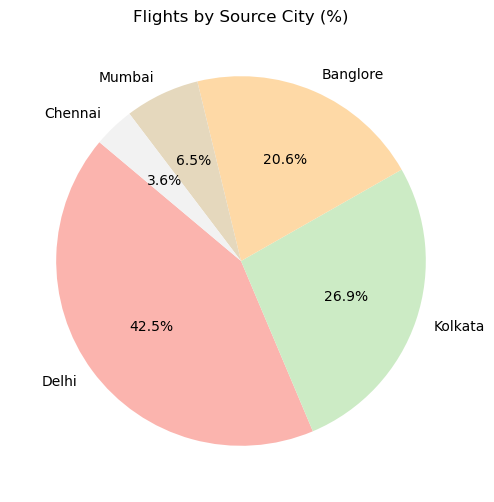

In [203]:
if 'Source' in df.columns:
    counts = df['Source'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
            colors=plt.cm.Pastel1(np.linspace(0, 1, len(counts))))
    plt.title("Flights by Source City (%)")
    plt.show()

## 🏁 Conclusion  

Through this project, I have:  

- **Cleaned & Preprocessed** the dataset by handling missing values, correcting data types, and removing duplicates.  
- **Explored Data Distributions** to understand how flight prices vary across airlines, routes, and journey details.  
- **Created Meaningful Visualizations** such as bar charts, pie charts, and pairplots to highlight trends and patterns.  
- **Identified Key Insights**, including:  
  - Certain airlines consistently have higher or lower average prices.  
  - The number of stops has a significant impact on ticket prices.  
  - Journey month and time of day can influence pricing trends.  
- **Practiced Python Data Analysis Skills** using `pandas`, `numpy`, `matplotlib`, and `seaborn`.  

---

📊 *This analysis improved my skills in data cleaning, exploratory data analysis, and visualization — helping me better understand how to uncover insights from real-world datasets.*  
